In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
os.listdir(os.getcwd())

['OmicDownlload.ipynb',
 '.ipynb_checkpoints',
 'data',
 'GSE42861_annot.csv',
 'GSE51032_annot.csv',
 'GSE69270_annot.csv',
 'GSE36054_annot.csv',
 'GSE64495_annot.csv',
 'GSE30870_annot.csv',
 'GSE41169_annot.csv',
 'GSE73103_annot.csv',
 'join_annot.ipynb',
 'metaannot.csv',
 'GSE52588_annot.csv',
 'GSE51057_annot.csv',
 'metaexpr.csv',
 'expr',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'expr_leik.csv',
 'normalized_leik_expr.csv',
 'req.txt',
 'filterd_CpG_leiko_corrected_12032024.csv',
 'requirements_omics_preprocessing.txt']

In [ ]:
annot_list = ['GSE42861_annot.csv',
 'GSE51032_annot.csv',
 'GSE69270_annot.csv',
 'GSE36054_annot.csv',
 'GSE64495_annot.csv',
 'GSE30870_annot.csv',
 'GSE41169_annot.csv',
 'GSE73103_annot.csv','GSE52588_annot.csv',
 'GSE51057_annot.csv']

In [ ]:
leiko = [ 'GSE36054_annot.csv', 'GSE42861_annot.csv', 'GSE51032_annot.csv','GSE51057_annot.csv', 'GSE69270_annot.csv']

In [ ]:
metaannot = pd.DataFrame()
for i in annot_list:
    df = pd.read_csv(i, index_col='GSM')
    df['cohort'] = i
    if set([i])<=set(leiko):
        df['cohort_type']='leiko'
    else:
        df['cohort_type']='whole_blood'

    if metaannot.empty:
        metaannot = df

    else:
        metaannot=pd.concat([metaannot, df])


In [ ]:
metaannot.loc[metaannot['cohort'] ==  'GSE36054_annot.csv', 'age'] = metaannot.loc[metaannot['cohort'] ==  'GSE36054_annot.csv', 'age at collection months'] / 12

Modify age column

In [ ]:
def modify_age(row):
    if row['cohort'] == 'GSE30870_annot.csv' and row['age'] == 'Newborn':
        return 0
    elif row['cohort'] == 'GSE30870_annot.csv':
        age_parts = row['age'].split(' ')
        print(age_parts)
        return int(age_parts[0])
    else:
        return row['age']

metaannot['age'] = metaannot.apply(modify_age, axis=1)

['103', 'years']
['97', 'years']
['95', 'years']
['97', 'years']
['97', 'years']
['98', 'years']
['96', 'years']
['100', 'years']
['90', 'years']
['91', 'years']
['92', 'years']
['89', 'years']
['90', 'years']
['89', 'years']
['90', 'years']
['91', 'years']
['89', 'years']
['89', 'years']
['90', 'years']
['90', 'years']


In [ ]:
metaannot.loc[metaannot['cohort'] ==  'GSE69270_annot.csv', 'age'] = metaannot.loc[metaannot['cohort'] ==  'GSE69270_annot.csv',  'age in 2011']

In [ ]:
metaannot.to_csv('metaannot.csv')

In [ ]:
metaannot['cohort'].unique()

array(['GSE42861_annot.csv', 'GSE51032_annot.csv', 'GSE69270_annot.csv',
       'GSE36054_annot.csv', 'GSE64495_annot.csv', 'GSE30870_annot.csv',
       'GSE41169_annot.csv', 'GSE73103_annot.csv', 'GSE52588_annot.csv',
       'GSE51057_annot.csv'], dtype=object)

Plot age distribution for each dataset

GSE42861_annot.csv  has  689 samples


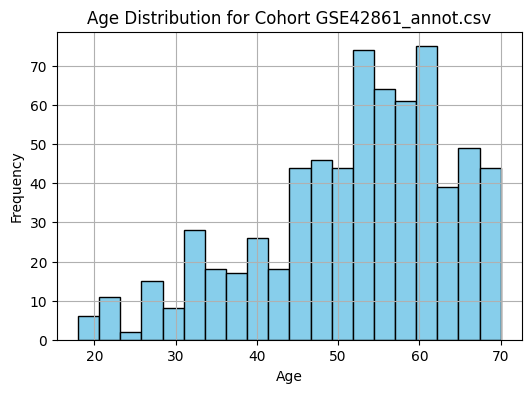

GSE51032_annot.csv  has  845 samples


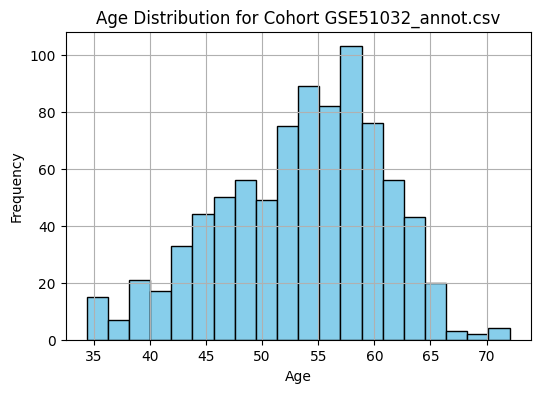

GSE69270_annot.csv  has  184 samples


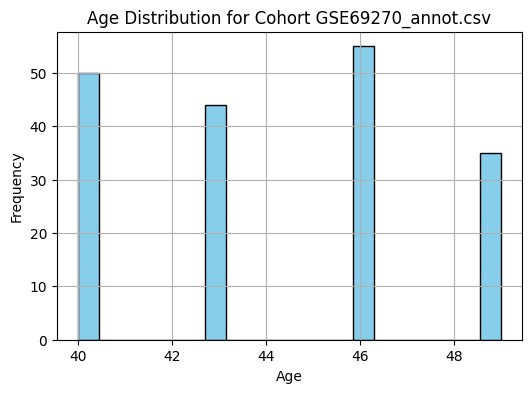

GSE36054_annot.csv  has  192 samples


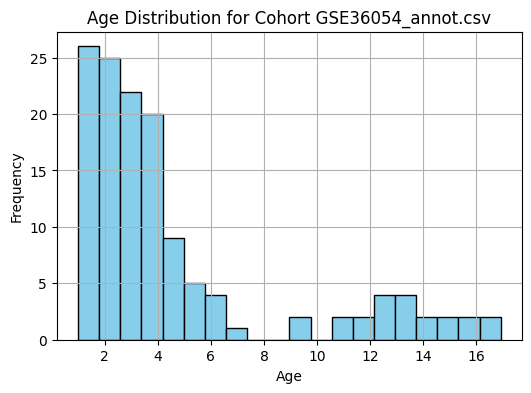

GSE64495_annot.csv  has  113 samples


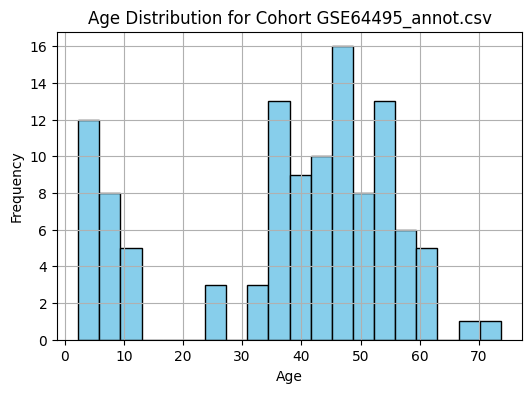

GSE30870_annot.csv  has  40 samples


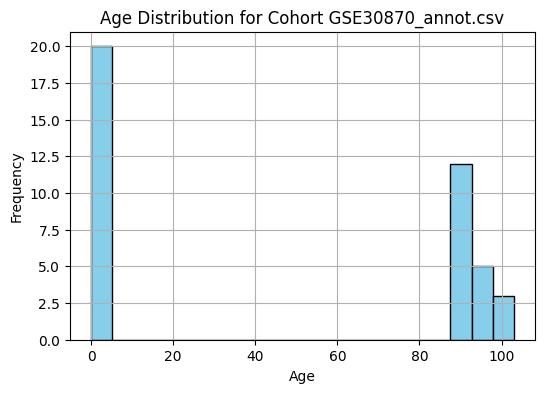

GSE41169_annot.csv  has  95 samples


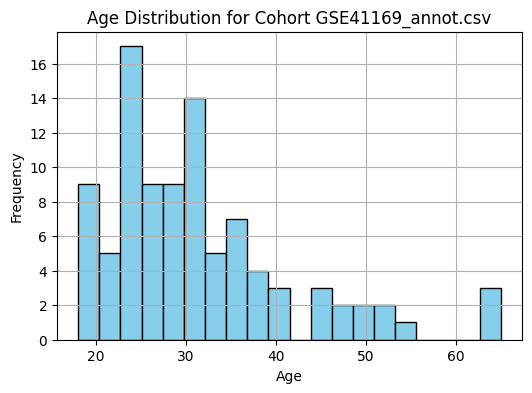

GSE73103_annot.csv  has  355 samples


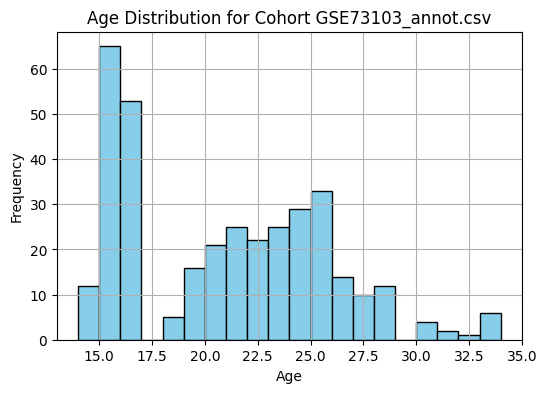

GSE52588_annot.csv  has  87 samples


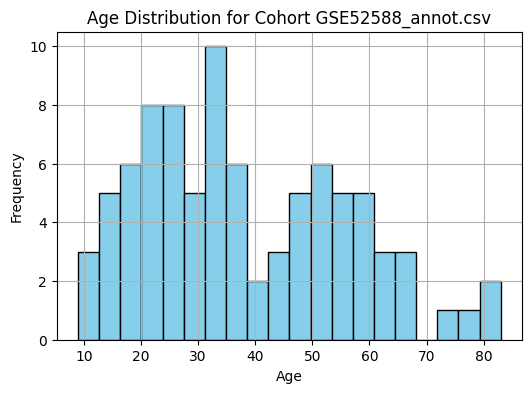

GSE51057_annot.csv  has  329 samples


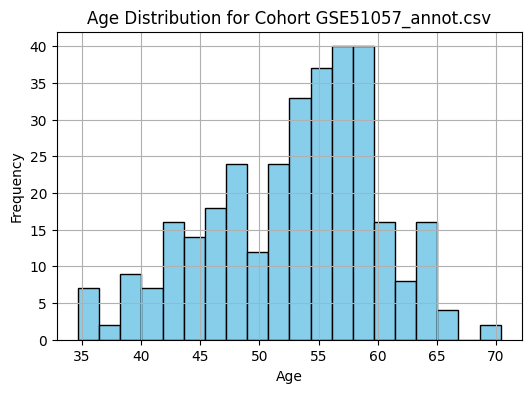

In [ ]:
for cohort in metaannot['cohort'].unique():
    cohort_data = metaannot[metaannot['cohort'] == cohort]
    print(cohort,' has ', cohort_data.shape[0], 'samples')

    plt.figure(figsize=(6, 4))
    plt.hist(cohort_data['age'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Age Distribution for Cohort {cohort}')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


Verify that GSE51057 and GSE51032 contain distinct sets of samples

In [ ]:
l1=set(metaannot[metaannot['cohort']=='GSE51057_annot.csv'].index)
l2=set(metaannot[metaannot['cohort']=='GSE51032_annot.csv'].index)
l2-l1

{'GSM1235592',
 'GSM1235593',
 'GSM1235595',
 'GSM1235597',
 'GSM1235598',
 'GSM1235599',
 'GSM1235602',
 'GSM1235603',
 'GSM1235608',
 'GSM1235609',
 'GSM1235610',
 'GSM1235613',
 'GSM1235614',
 'GSM1235615',
 'GSM1235616',
 'GSM1235618',
 'GSM1235622',
 'GSM1235623',
 'GSM1235626',
 'GSM1235627',
 'GSM1235629',
 'GSM1235630',
 'GSM1235633',
 'GSM1235634',
 'GSM1235635',
 'GSM1235636',
 'GSM1235639',
 'GSM1235642',
 'GSM1235645',
 'GSM1235647',
 'GSM1235648',
 'GSM1235650',
 'GSM1235651',
 'GSM1235652',
 'GSM1235653',
 'GSM1235656',
 'GSM1235658',
 'GSM1235662',
 'GSM1235663',
 'GSM1235665',
 'GSM1235666',
 'GSM1235668',
 'GSM1235669',
 'GSM1235671',
 'GSM1235673',
 'GSM1235674',
 'GSM1235675',
 'GSM1235676',
 'GSM1235678',
 'GSM1235681',
 'GSM1235682',
 'GSM1235684',
 'GSM1235685',
 'GSM1235686',
 'GSM1235687',
 'GSM1235688',
 'GSM1235689',
 'GSM1235690',
 'GSM1235691',
 'GSM1235692',
 'GSM1235693',
 'GSM1235695',
 'GSM1235696',
 'GSM1235697',
 'GSM1235698',
 'GSM1235699',
 'GSM12357